# Pima Indians Diabetes Prediction

This is a Machine Learning project to predict the occurance of diabetes in the patients. It uses BaggingClassifier with DecisionTreeClassifier as the base estimator. The PIMA Indians Diabetes dataset has been downloaded from the [UCI Repository](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [130]:
'''
Import the libraries to be used in the project.
'''

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [131]:
'''
Helper Functions.
'''

def draw_heatmap(data, figsize=(10, 10)):
    '''
    Draws a correlation heatmap.
    '''
    
    correlation_matrix = data.corr().round(2)
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=True)
    return None

    
def get_accuracy(predictions, actual):
    '''
    Returns the accuracy of the model by comparing the prediction and the actual value.
    '''
    
    actual = actual.tolist()
    accurate = 0
    for i in range(len(predictions)):
        if predictions[i] == actual[i]:
            accurate += 1
    accuracy = round(accurate / len(predictions), 2)
    return accuracy
    

def evaluate(model, X, Y, method):
    '''
    Evaluate the mode on the input data X and the target data Y.
    '''
    
    predictions = model.predict(X)
    accuracy = get_accuracy(predictions, Y)
    print(f'Accuracy for {method}: {accuracy}')
    return None

In [132]:
'''
Load the dataset.
'''

diabetes = pd.read_csv('datasets/pima_indians_diabetes.csv')
diabetes

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


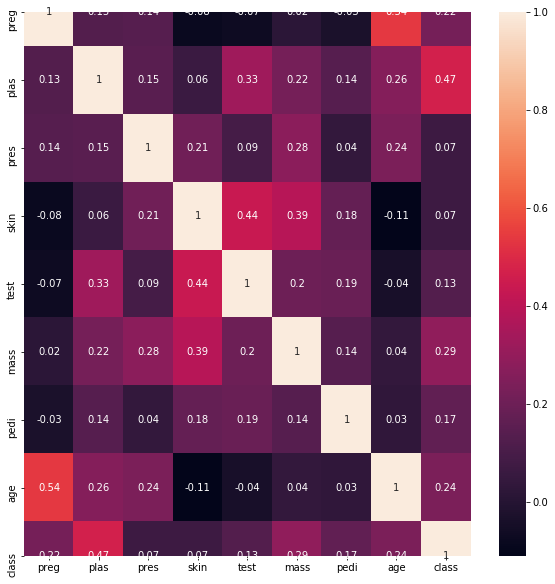

In [137]:
'''
Finds if there is any correlation between the variables.
'''

draw_heatmap(diabetes)

In [134]:
'''
Split the data into training and testing samples.
'''

features = diabetes.drop('class', axis=1)
target = diabetes['class']
X = features
Y = target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print(f'Training input symbols:  {X_train.shape}')
print(f'Testing input symbols:   {X_test.shape}')
print(f'Training target symbols: {Y_train.shape}')
print(f'Testing target symbols:  {Y_test.shape}')

Training input symbols:  (614, 8)
Testing input symbols:   (154, 8)
Training target symbols: (614,)
Testing target symbols:  (154,)


In [135]:
'''
Create a Bagging Classifier with Decision Tree Classifier as the base estimator.
'''

model = BaggingClassifier(base_estimator=DecisionTreeClassifier())
model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [138]:
'''
Evaluate the model.
'''

evaluate(model, X_train, Y_train, 'training')
evaluate(model, X_test, Y_test, 'testing')

Accuracy for training: 0.99
Accuracy for testing: 0.72
